In [1]:
!which python
import sys
sys.version



/Users/jagpreetsingh/Documents/CBD_3335_Data-mining/data_mining/assignment2/HousePrice-Prediction/venv/bin/python


'3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline


In [3]:
df = pd.read_csv('House_Price_dataset.csv')

In [4]:
def set_labels(title=None, xlabel=None ,ylabel=None):
    plt.figure(figsize=(8,7))
    plt.title(title,fontdict={'fontsize':15,'fontweight':'bold'})
    plt.xlabel(xlabel,fontdict={'fontsize':13})
    plt.ylabel(ylabel,fontdict={'fontsize':13})
    plt.tight_layout()


In [5]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [6]:
df.tail()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla
168445,17355287,10045,https://www.zameen.com/Property/bahria_town_ka...,House,9000000,Bahria Town Karachi,Karachi,Sindh,25.113565,67.353811,3,9.4 Marla,For Sale,3,07-18-2019,ZPN Real Estate & Builders,Ali Raza,Marla,9.4,5-10 Marla


## Duplicates check

In [7]:
print(f"shape with duplicates:{df.shape}")
print(f"percentage of duplicates:{df.duplicated().mean()}\n")
df=df.drop_duplicates()
print(f"shape after duplicates removed:{df.shape}")

shape with duplicates:(168446, 20)
percentage of duplicates:0.0

shape after duplicates removed:(168446, 20)


In [8]:
## removing spacing from column name and lowering column name for standardization

df.columns = [re.sub('\s','',col).lower() for col in df.columns]
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'areatype', 'areasize', 'areacategory'],
      dtype='object')

In [9]:
## only considerinf data for sale and excluding data for rented houses

print(f"value count of sales v/s rent:\n{df.purpose.value_counts()}\n")


df  = df.query("purpose=='For Sale'")
df.drop('purpose',axis=1,inplace=True)
print(f"shape of sales data: {df.shape}")



value count of sales v/s rent:
purpose
For Sale    120655
For Rent     47791
Name: count, dtype: int64

shape of sales data: (120655, 19)


In [10]:
## get the area in sq-ft

## 1 marla == 272.25 sq-ft
## 1 kanal == 5445 sq-ft
df['areasize'] = df['areasize'] * (df['areatype'].map({'Marla': 272.25, 'Kanal': 5445}))

## drop columns "area" "Area Type"
df.drop(['area','areatype'],axis=1,inplace=True)

print(f"shape after drop:{df.shape}")

shape after drop:(120655, 17)


## Statistical Analysis

In [11]:
df.describe(percentiles=[.05,.15,.25,.35,.5,.65,.75,.85]).T

,count,mean,std,min,5%,15%,25%,35%,50%,65%,75%,85%,max
property_id,120655.0,1.554512e+07,2.284500e+06,86575.000000,1.045207e+07,1.320413e+07,1.483182e+07,1.574018e+07,1.661523e+07,1.696019e+07,1.706808e+07,1.719725e+07,1.735772e+07
location_id,120655.0,4.701090e+03,3.818224e+03,1.000000,2.330000e+02,5.180000e+02,1.446000e+03,1.613000e+03,3.657000e+03,6.836000e+03,8.288000e+03,9.249000e+03,1.422000e+04
price,120655.0,2.476513e+07,3.959754e+07,0.000000,3.250000e+06,5.500000e+06,7.400000e+06,9.500000e+06,1.350000e+07,1.950000e+07,2.600000e+07,4.100000e+07,2.000000e+09
latitude,120655.0,2.943461e+01,3.679416e+00,24.749425,2.482164e+01,2.491173e+01,2.494637e+01,2.502248e+01,3.142959e+01,3.148742e+01,3.158518e+01,3.356280e+01,7.318409e+01
longitude,120655.0,7.120058e+01,3.281108e+00,31.389173,6.704110e+01,6.706627e+01,6.712916e+01,6.730881e+01,7.307416e+01,7.323599e+01,7.425655e+01,7.434233e+01,7.456473e+01
baths,120655.0,3.085948e+00,2.560652e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,4.030000e+02
bedrooms,120655.0,3.401384e+00,1.928359e+00,0.000000,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,2.700000e+01
areasize,120655.0,3.012505e+03,1.621533e+04,0.000000,6.806250e+02,9.801000e+02,1.306800e+03,1.361250e+03,1.742400e+03,2.613600e+03,2.722500e+03,5.445000e+03,3.267000e+06


## Obseravation 
- Minimum `price` is zero which very unnatural.
- similarly maximum `baths` are 403, which is an extreme value.
- there are 68 maximum bedrooms.
- minimum `areasize` is zero.
 

In [12]:
## removed records with price as zero
df = df[df['price']!=0]

## removed records with area as zero
df = df[df['areasize'] !=0]


print(f"shape:{df.shape}")

shape:(120644, 17)


In [13]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,bedrooms,date_added,agency,agent,areasize,areacategory
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,02-04-2019,NaN,NaN,1089.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,05-04-2019,NaN,NaN,1524.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,07-17-2019,NaN,NaN,2178.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,04-05-2019,NaN,NaN,10890.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.0,5-10 Marla


In [14]:
## drop "page_url", "property_id" as these are only used as identification and do not conribute to our analysis
## drop "location"  and "location_id" as we have latitude and longitude

df.drop(['page_url','property_id','location_id','location'],axis=1,inplace=True)

print(f"shape after drop:{df.shape}")

shape after drop:(120644, 13)


In [15]:
df.head()

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,date_added,agency,agent,areasize,areacategory
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,02-04-2019,NaN,NaN,1089.0,0-5 Marla
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,05-04-2019,NaN,NaN,1524.6,5-10 Marla
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,07-17-2019,NaN,NaN,2178.0,5-10 Marla
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,04-05-2019,NaN,NaN,10890.0,1-5 Kanal
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.0,5-10 Marla


In [16]:
## types of each columns

df.dtypes

property_type     object
price              int64
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
bedrooms           int64
date_added        object
agency            object
agent             object
areasize         float64
areacategory      object
dtype: object

Missing Values:
property_type    0.000000
price            0.000000
city             0.000000
province_name    0.000000
latitude         0.000000
longitude        0.000000
baths            0.000000
bedrooms         0.000000
date_added       0.000000
agency           0.260792
agent            0.260800
areasize         0.000000
areacategory     0.000000
dtype: float64


<Axes: >

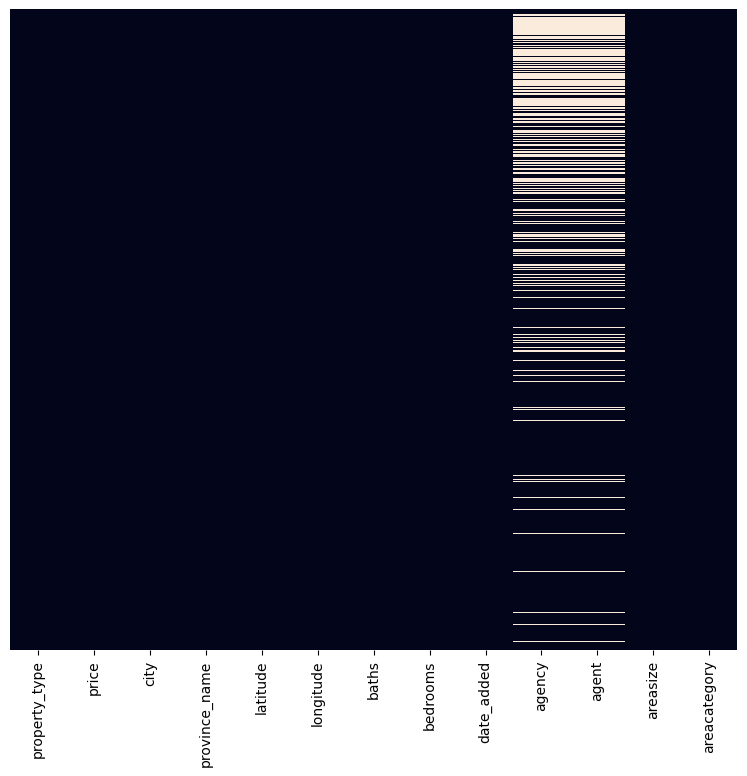

In [17]:
## missing values
print(f"Missing Values:\n{df.isnull().mean()}")
set_labels()
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [18]:
## distinguish the columns as categoirical and numerical

categorical_columns = [col for col in df.columns if df[col].dtype == 'O']
numerical_columns = [col for col in df.columns if col not in categorical_columns]

print(f"Categorical Columns:\n{categorical_columns}\n")
print(f"No. of categorical columns:{len(categorical_columns)}\n\n")
print(f"Numerical columns:\n{numerical_columns}\n")
print(f"No. of numerical columns:{len(numerical_columns)}")

Categorical Columns:
['property_type', 'city', 'province_name', 'date_added', 'agency', 'agent', 'areacategory']

No. of categorical columns:7


Numerical columns:
['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'areasize']

No. of numerical columns:6


## EDA

### Categorical Columns

In [19]:
for col in categorical_columns:
    print(f"No of Unique values for {col.capitalize()}: {df[col].nunique()}\n")

No of Unique values for Property_type: 7

No of Unique values for City: 5

No of Unique values for Province_name: 3

No of Unique values for Date_added: 120

No of Unique values for Agency: 5501

No of Unique values for Agent: 9561

No of Unique values for Areacategory: 20



In [20]:
## 
def cardinality(categorical_columns,threshold=20):
    low_cardinality_columns = []
    for col in categorical_columns:
        if df[col].nunique() < threshold:
            low_cardinality_columns.append(col)
    return low_cardinality_columns

## calling cardinality function
threshold = 23
low_card_columns = cardinality(categorical_columns,threshold)

print(f"columns with cardinality less than {threshold}:{low_card_columns}")



columns with cardinality less than 23:['property_type', 'city', 'province_name', 'areacategory']


- for columns agency and agent where agency represent what agency sold the house and agent is the name of the agent we can transform this feature to column which show is the house is sold by agency or not

In [21]:
df['agency'] = df['agency'].fillna(0)
df['agency'] = df['agency'].apply(lambda x: 1 if x !=0 else 0)

print(f"percentage of distribution of agency :\n{df['agency'].value_counts()/df.shape[0]}")

percentage of distribution of agency :
agency
1    0.739208
0    0.260792
Name: count, dtype: float64


In [22]:
## droping the "date added" column as does not contribute to our analysis and also agent column as no longer needed
df.drop(['date_added','agent'],axis=1,inplace=True)
print(f"shape after drop:{df.shape}") 

shape after drop:(120644, 11)


Percentage of each categories in Property_type:
property_type
House            0.729137
Flat             0.233066
Upper Portion    0.021783
Lower Portion    0.008322
Farm House       0.005040
Penthouse        0.002445
Room             0.000207
Name: count, dtype: float64


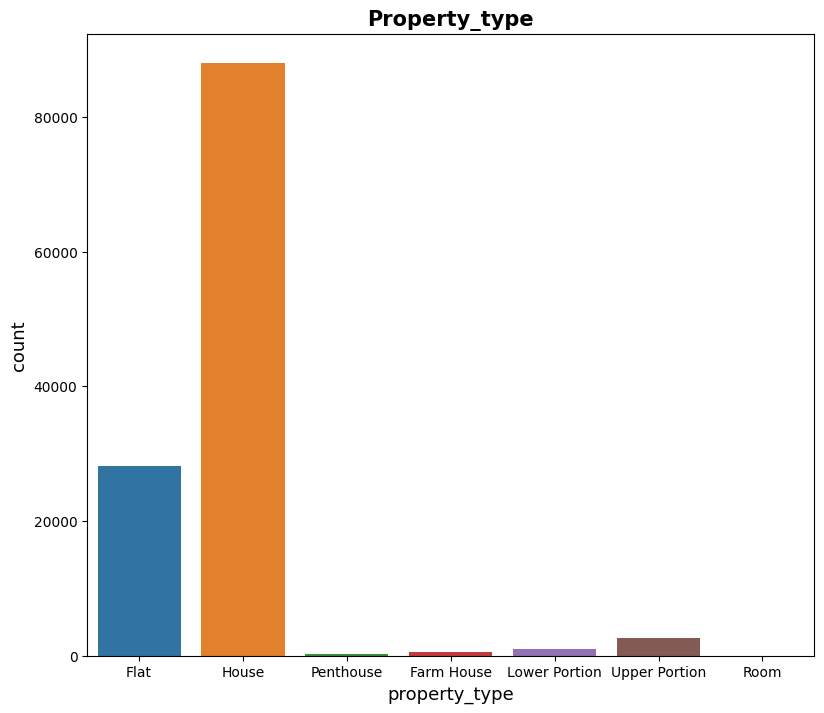

Percentage of each categories in City:
city
Karachi       0.386816
Lahore        0.343341
Islamabad     0.133484
Rawalpindi    0.099425
Faisalabad    0.036935
Name: count, dtype: float64


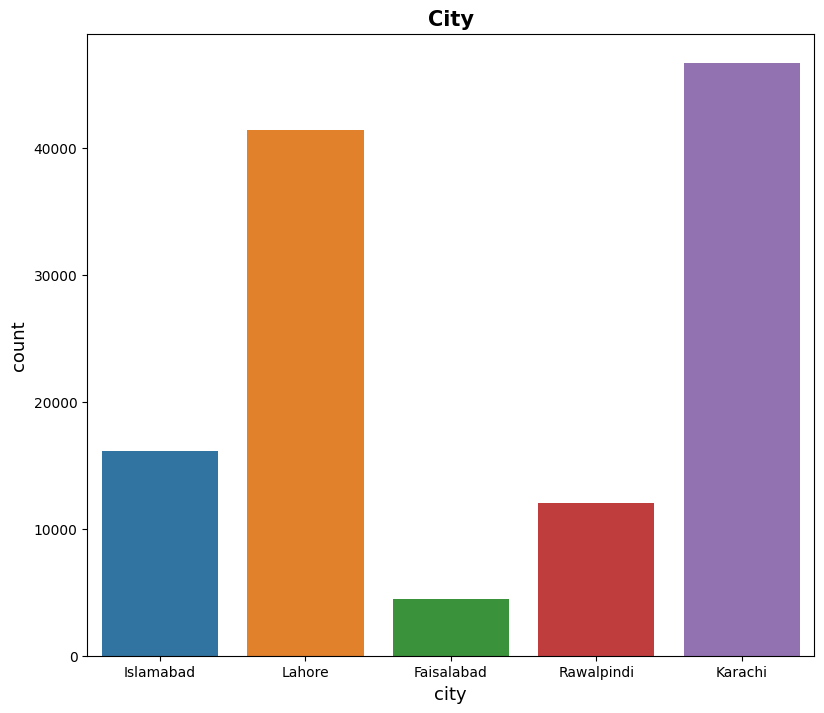

Percentage of each categories in Province_name:
province_name
Punjab               0.479701
Sindh                0.386816
Islamabad Capital    0.133484
Name: count, dtype: float64


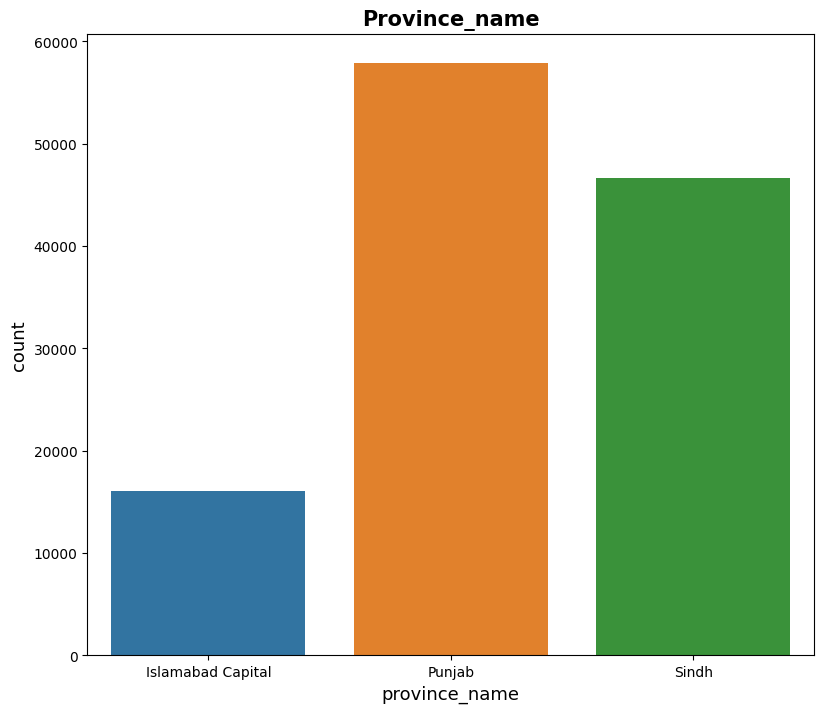

Percentage of each categories in Areacategory:
areacategory
0-5 Marla        0.424431
5-10 Marla       0.336585
1-5 Kanal        0.149199
10-15 Marla      0.067977
15-20 Marla      0.017697
5-10 Kanal       0.002387
15-20 Kanal      0.000647
10-15 Kanal      0.000332
20-30 Kanal      0.000298
30-40 Kanal      0.000174
40-50 Kanal      0.000083
60-70 Kanal      0.000066
100-200 Kanal    0.000025
80-90 Kanal      0.000025
200-300 Kanal    0.000025
90-100 Kanal     0.000017
400-500 Kanal    0.000008
50-60 Kanal      0.000008
70-80 Kanal      0.000008
500-600 Kanal    0.000008
Name: count, dtype: float64


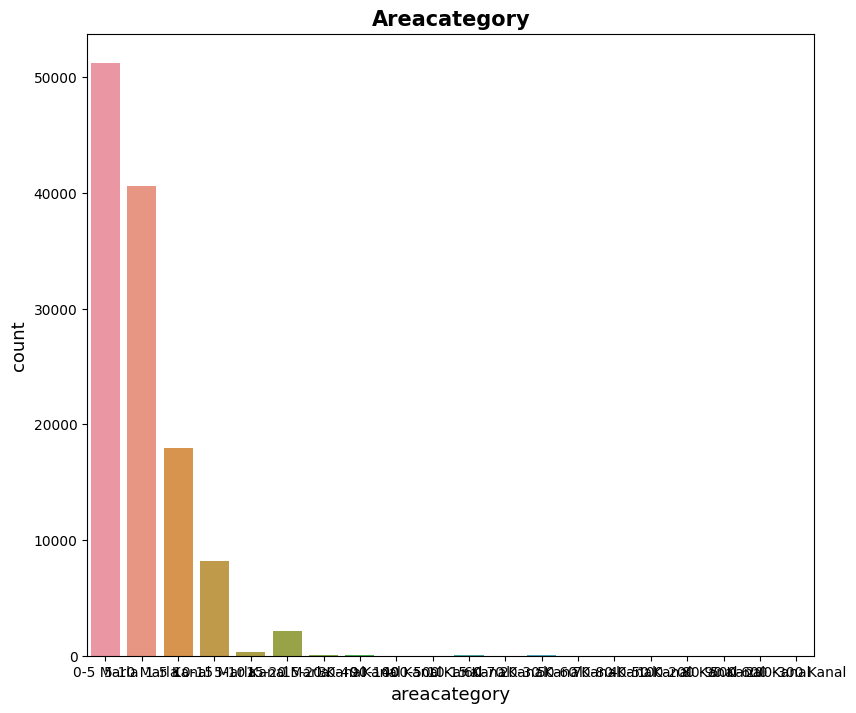

In [23]:
categorical_columns = low_card_columns 
for col in categorical_columns:
    set_labels(title=col.capitalize())
    print(f"Percentage of each categories in {col.capitalize()}:\n{df[col].value_counts()/df.shape[0]}")
    if col == 'area category':
        sns.countplot(data=df,x=col)
        plt.xticks(rotation=90)
    else:
        sns.countplot(data=df,x=col)
    plt.show()
    

## Observation
- `areacategory` can be dropped since there is 2-3 category dominating, Moreover we have the `area` column.

In [24]:
## droping column areacategory
df.drop('areacategory',axis=1,inplace=True)

## Numerical Columns

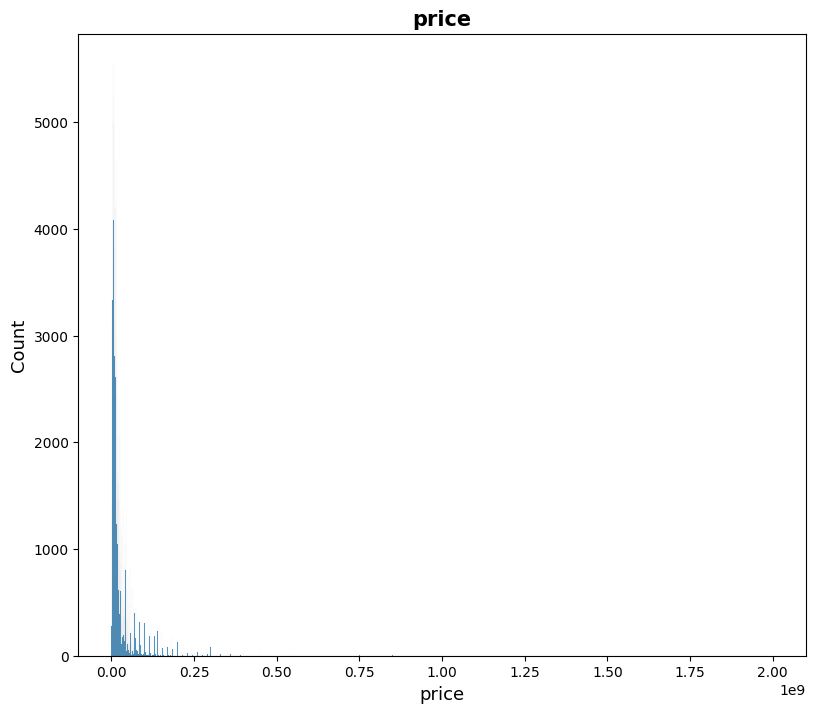

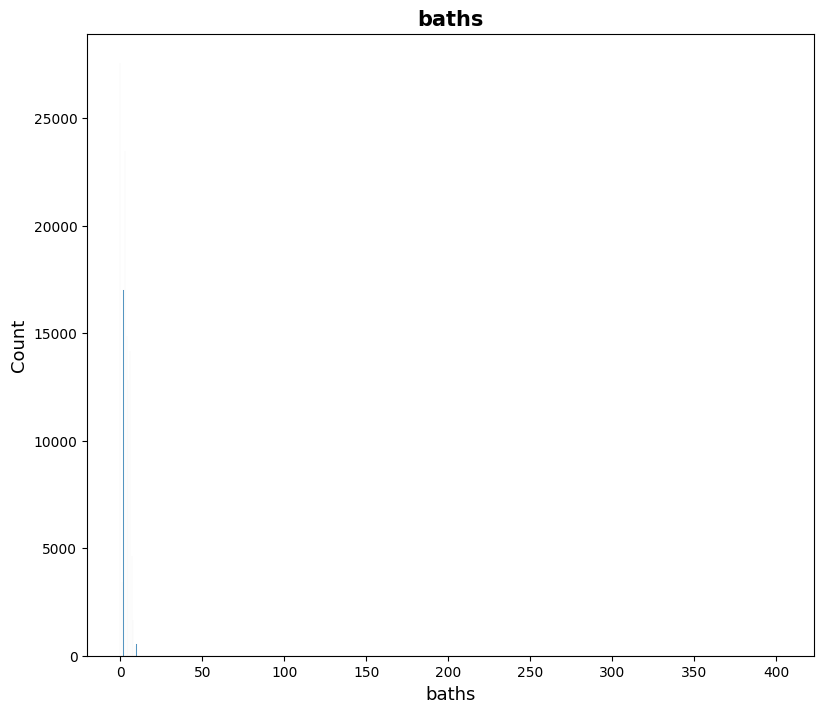

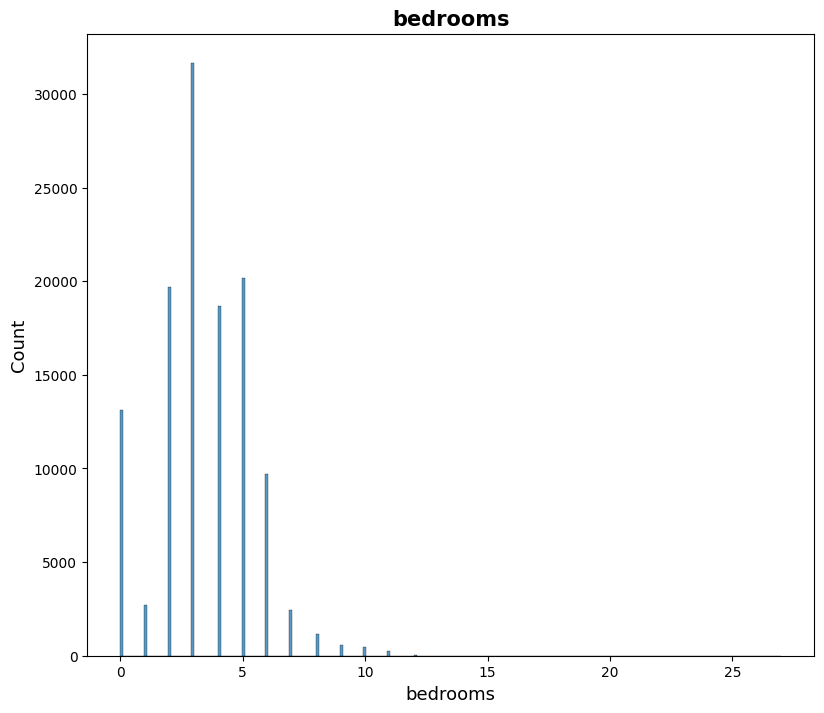

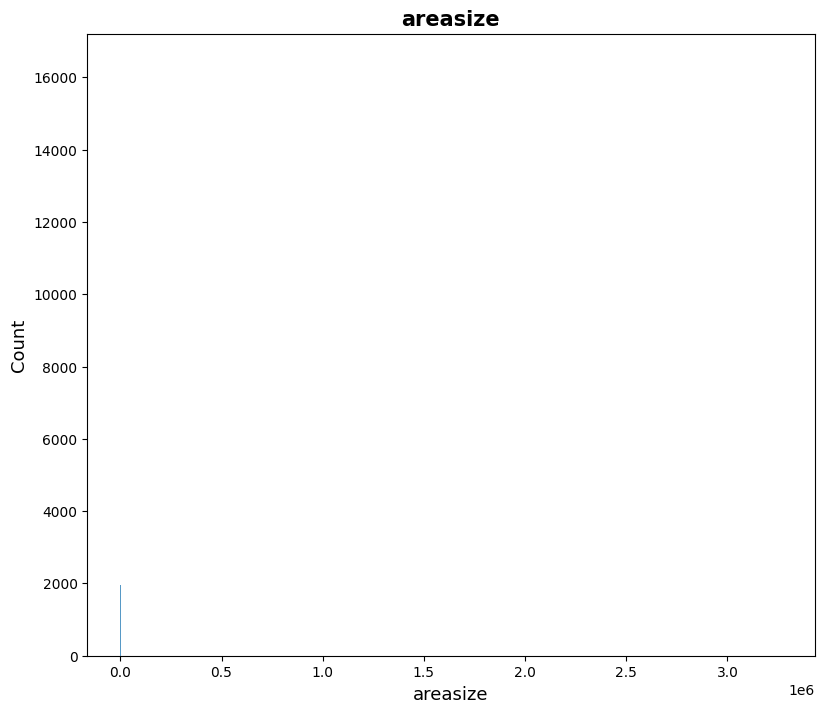

In [25]:
for col in numerical_columns:
    if col not in ['latitude','longitude']:
        set_labels(title=col)
        sns.histplot(data=df, x=col)
        plt.show()

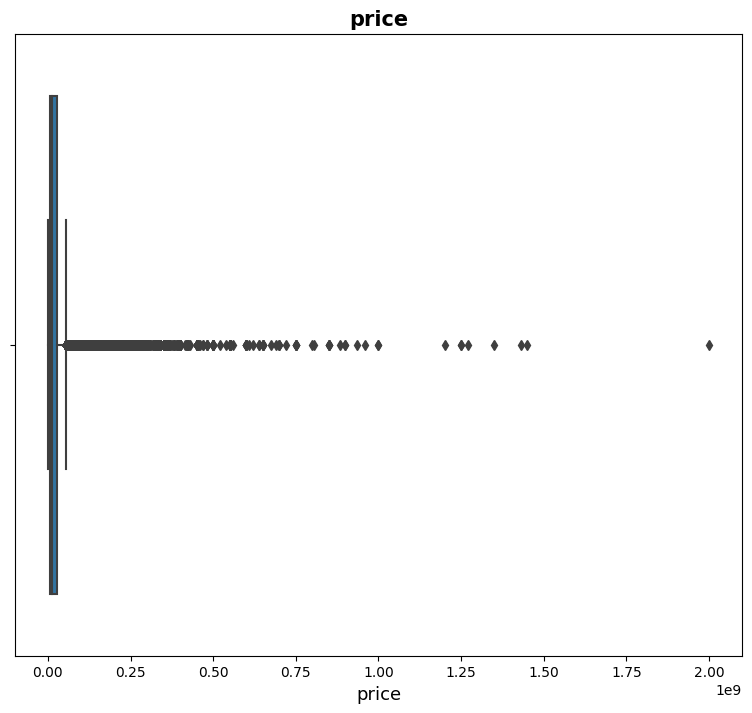

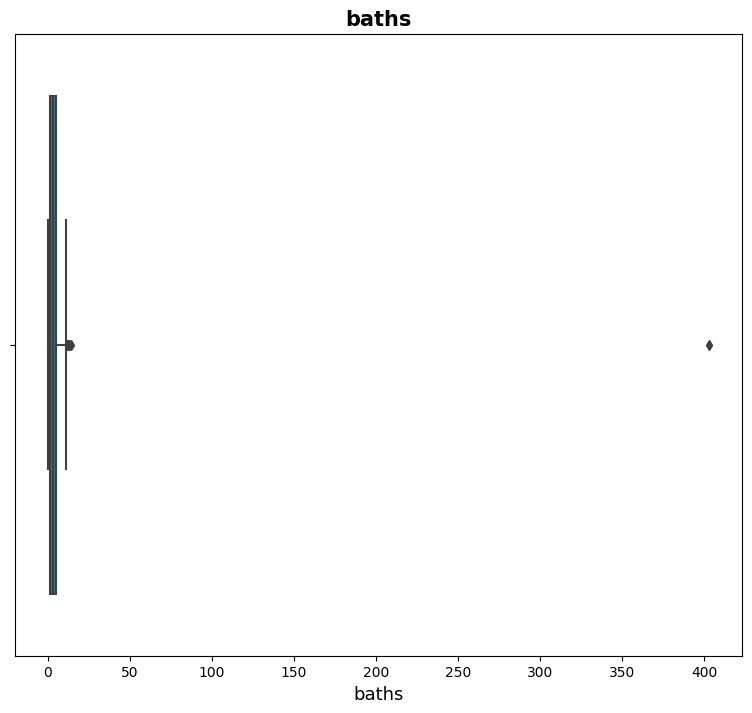

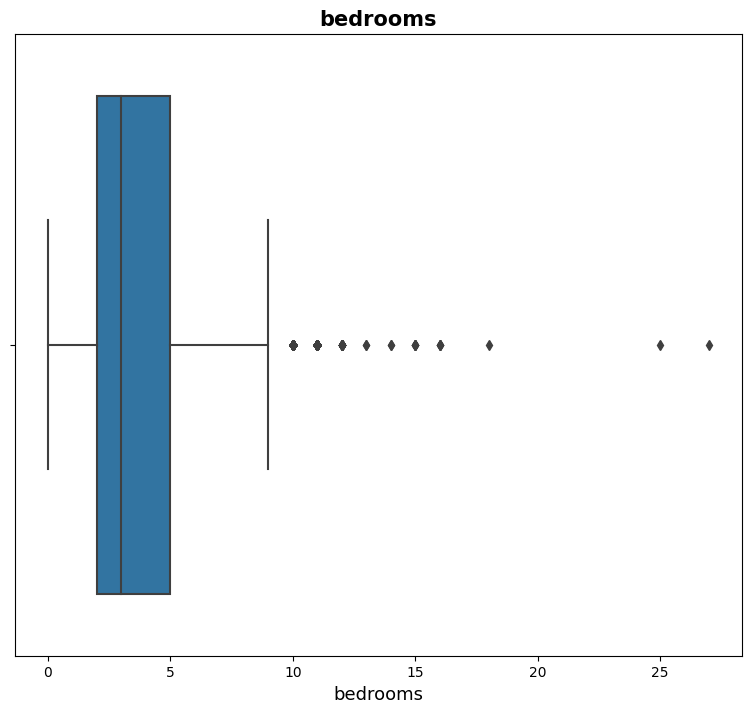

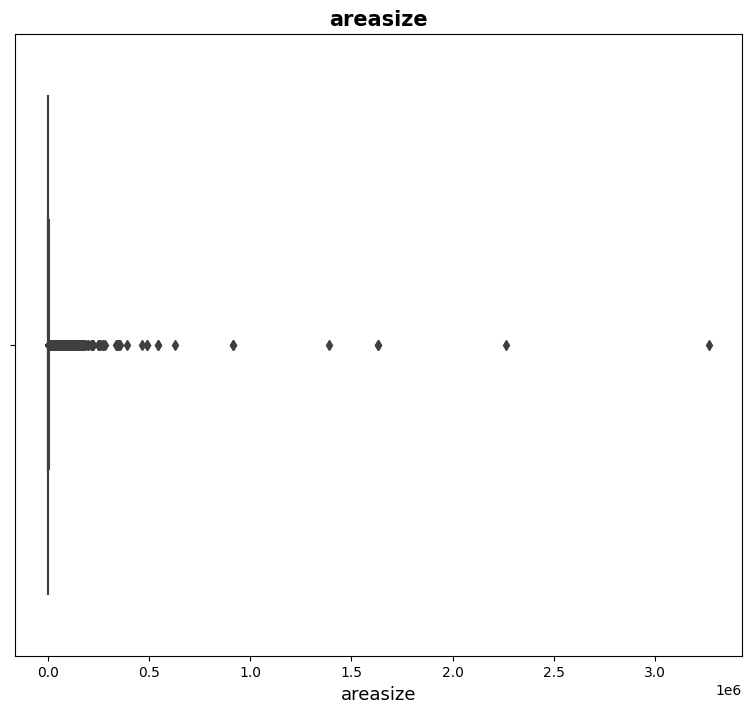

In [26]:
for col in numerical_columns:
    if col not in ['latitude','longitude']:
        set_labels(title=col)
        sns.boxplot(data=df, x=col)
        plt.show()

## observation
looking at baths and bedrooms columns for extreme values

In [27]:
q1 = np.quantile(df['baths'],.25,axis=0)
q3 = np.quantile(df['baths'],.75,axis=0)
iqr = q3-q1
low_bound = q1 - (iqr*1.5)
upper_bound = q3 + (iqr*1.5)
q1,q3,iqr,low_bound,upper_bound





(1.0, 5.0, 4.0, -5.0, 11.0)

<Axes: title={'center': 'Price vs Baths'}, xlabel='Price', ylabel='Baths'>

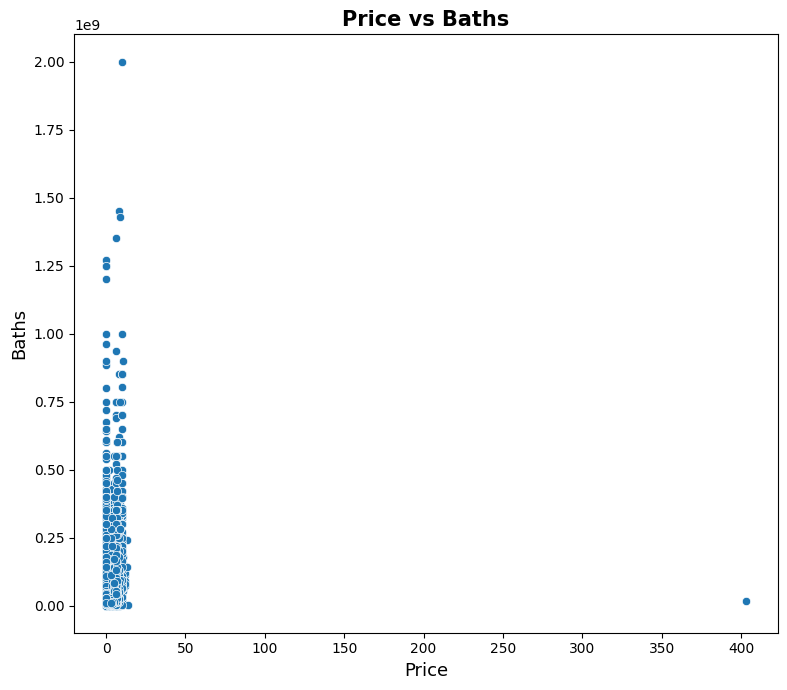

In [28]:
set_labels(title='Price vs Baths',xlabel='Price',ylabel='Baths')
sns.scatterplot(y='price',x='baths',data=df)


<Axes: title={'center': 'Bedrooms vs Baths'}, xlabel='Bedrooms', ylabel='Baths'>

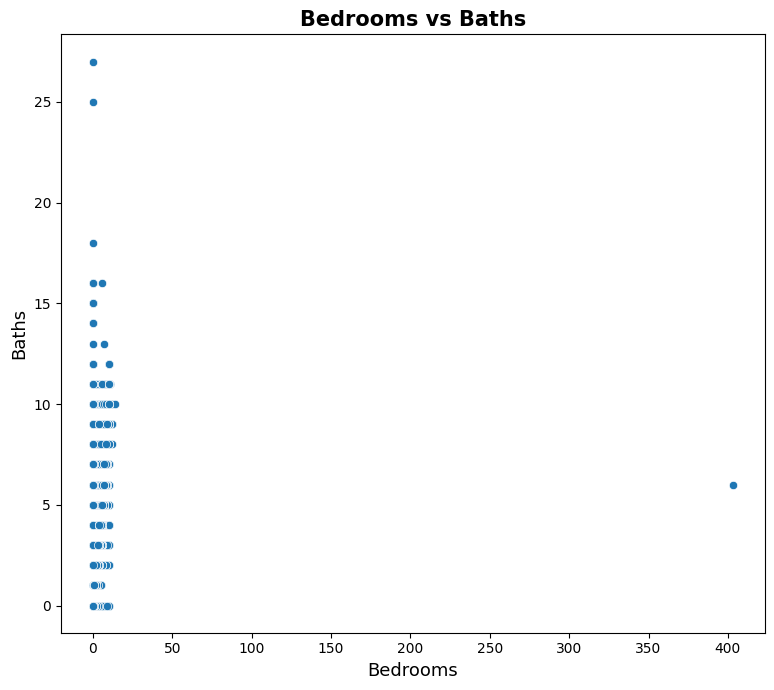

In [29]:
set_labels(title='Bedrooms vs Baths',xlabel='Bedrooms',ylabel='Baths')
sns.scatterplot(y='bedrooms',x='baths',data=df)

## Observation 
- We can observe that all values lies below 20 for baths and only few extreme observations which can be consider as outlier or faulty data

In [30]:
## setting the threshold as 20 
def remove_extreme(threshold,col,data):
    
    # print(f'no of extreme data points: {df.query(f"{col}>{threshold}").shape[0]}')
    data = data.query(f"{col}<={threshold}")
    return data


print(f"shape before removing faulty data: {df.shape}")
threshold = 20
col = 'baths'
df = remove_extreme(threshold,col,df)
print(f"shape after removing faulty data: {df.shape}")
# print(f'no of records with values greater than {df.query("{col}>20").shape[0]}')

shape before removing faulty data: (120644, 10)
shape after removing faulty data: (120643, 10)


<Axes: xlabel='bedrooms', ylabel='price'>

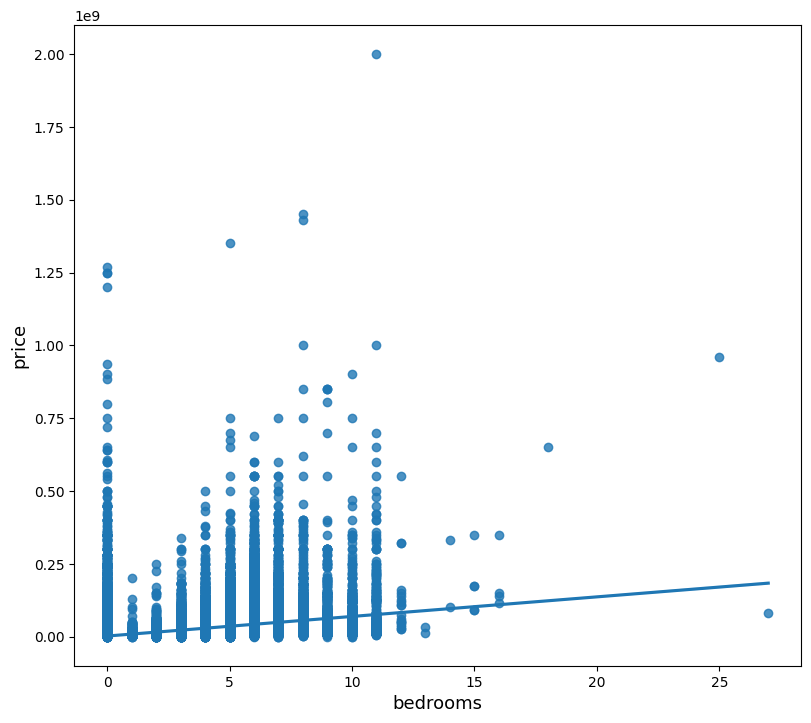

In [31]:
set_labels()
sns.regplot(x='bedrooms',y='price',data=df)

<Axes: xlabel='bedrooms', ylabel='areasize'>

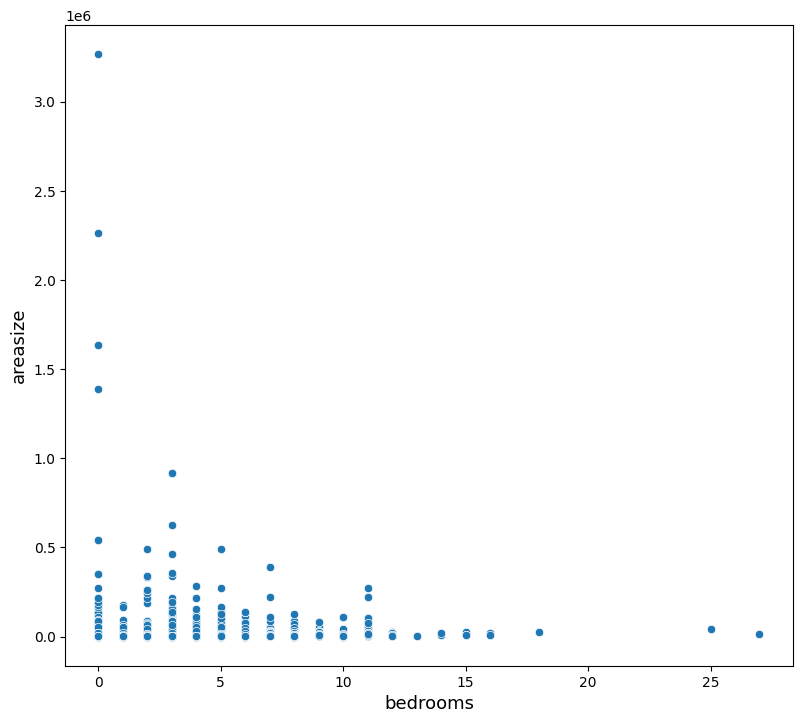

In [32]:
set_labels()
sns.scatterplot(x='bedrooms',y='areasize',data=df)

## Observation 
- We have only few data points for column `bedrooms` that shows unnatural or non linear relation, these could be due corrupt data, Hence we will go ahead and drop these records.
- We can also see that `areasize` has also some extreme values, we will be looking at at next.

In [33]:
## threshold values is decided after looking at the scatter plot above
threshold = 20
col = 'bedrooms'

print(f"shape before removing faulty data: {df.shape}")

##using the function we defined above
df = remove_extreme(threshold,col,df)

print(f"shape after removing faulty data: {df.shape}")

shape before removing faulty data: (120643, 10)
shape after removing faulty data: (120641, 10)


## Area size

<Axes: xlabel='areasize', ylabel='price'>

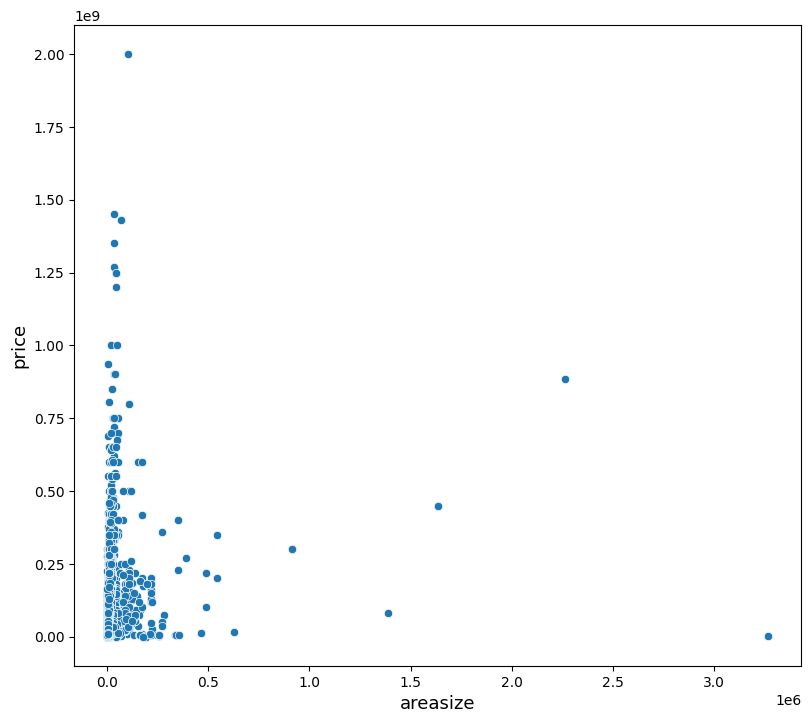

In [34]:
set_labels()
sns.scatterplot(x='areasize',y='price',data=df)

In [35]:
print(f"print max to see the scale of data: {df['areasize'].max(axis=0)}")

## threshold values is decided after looking at the scatter plot above
threshold = 2500000.0
col = 'areasize'

print(f"shape before removing faulty data: {df.shape}")

##using the function we defined above
df = remove_extreme(threshold,col,df)

print(f"shape after removing faulty data: {df.shape}")

print max to see the scale of data: 3267000.0
shape before removing faulty data: (120641, 10)
shape after removing faulty data: (120640, 10)


In [36]:
print(f"Columns Selected:\n{df.columns}")
print(f"no of columns: {df.shape[1]}")

Columns Selected:
Index(['property_type', 'price', 'city', 'province_name', 'latitude',
       'longitude', 'baths', 'bedrooms', 'agency', 'areasize'],
      dtype='object')
no of columns: 10
